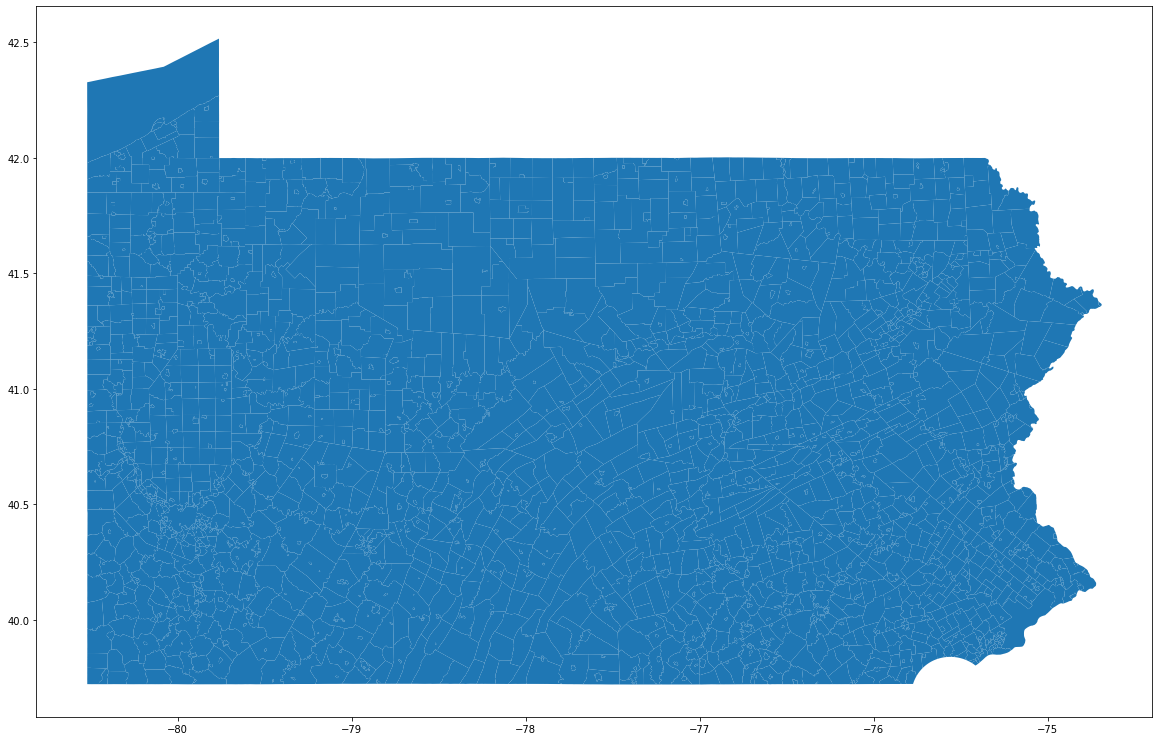

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = '/Users/edwardamoah/Downloads/tl_2016_42_cousub/tl_2016_42_cousub.shp'
data = gpd.read_file(shapefile_path)

# Plot the shapefile
data.plot(figsize=(20, 15))

# Show the plot
plt.show()


In [6]:
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/edwardamoah/Downloads/observations-387966.csv')

In [9]:
df.columns.tolist()

['id',
 'observed_on_string',
 'observed_on',
 'time_observed_at',
 'time_zone',
 'user_id',
 'user_login',
 'user_name',
 'created_at',
 'updated_at',
 'quality_grade',
 'license',
 'url',
 'image_url',
 'sound_url',
 'tag_list',
 'description',
 'num_identification_agreements',
 'num_identification_disagreements',
 'captive_cultivated',
 'oauth_application_id',
 'place_guess',
 'latitude',
 'longitude',
 'positional_accuracy',
 'private_place_guess',
 'private_latitude',
 'private_longitude',
 'public_positional_accuracy',
 'geoprivacy',
 'taxon_geoprivacy',
 'coordinates_obscured',
 'positioning_method',
 'positioning_device',
 'species_guess',
 'scientific_name',
 'common_name',
 'iconic_taxon_name',
 'taxon_id']

In [14]:
cl = ['id',
 'observed_on_string',
 'observed_on',
 'time_observed_at',
 'created_at',
 'updated_at',
 'latitude',
 'longitude',
 'geoprivacy',
 'scientific_name',]

In [16]:
df = df[cl]

In [18]:
def extract_month(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    return df

df1 = extract_month(df, 'observed_on')

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1075543496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1075543496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df[date_column].dt.month


In [20]:
def filter_by_month(df, month_column):
    df[month_column] = pd.to_datetime(df[month_column])
    filtered_df = df[df[month_column].dt.month.between(3, 5)]
    return filtered_df

df2 = filter_by_month(df1, 'observed_on')   

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/2383861592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[month_column] = pd.to_datetime(df[month_column])


In [22]:
df2.dropna(subset=['latitude', 'longitude'], inplace=True)

/var/folders/t7/8xb6r8jx3_bd842lt0tnr6sr0000gn/T/ipykernel_58725/1884027359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['latitude', 'longitude'], inplace=True)


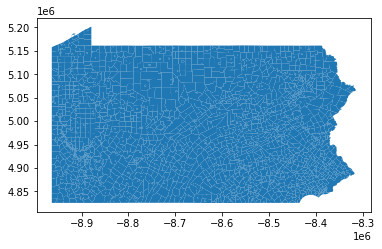

In [38]:
# Read the Pennsylvania shapefile
pennsylvania_shapefile_path = '/Users/edwardamoah/Downloads/Pennsylvania_Municipality_Boundary/Pennsylvania_Municipality_Boundary.shp'
pennsylvania_data = gpd.read_file(pennsylvania_shapefile_path)

# Plot the Pennsylvania map
pennsylvania_data.plot()

# Plot the points from df2 on the map
#df2.plot(ax=plt.gca(), marker='o', color='red', markersize=5)

df2.plot(ax = ax, kind='scatter', x='longitude', y='latitude', alpha=0.4)

# Show the plot
plt.show()


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

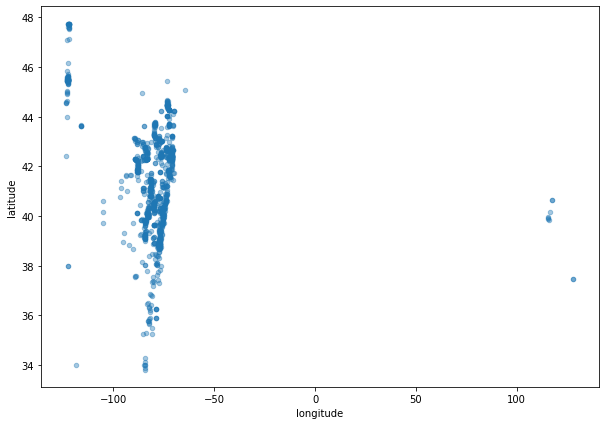

In [26]:
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7))

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

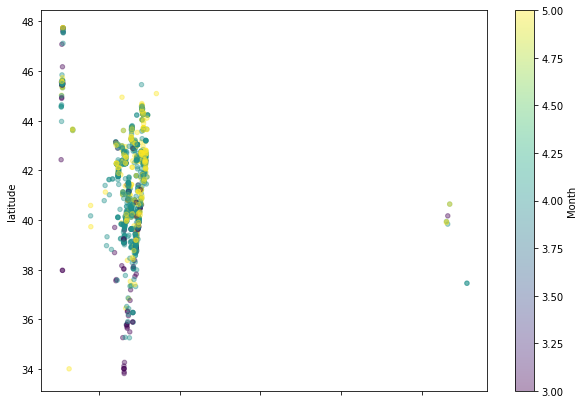

In [27]:
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7), c='Month', cmap=plt.get_cmap('jet'), colorbar=True)

In [28]:
df2.head()

,id,observed_on_string,observed_on,time_observed_at,created_at,updated_at,latitude,longitude,geoprivacy,scientific_name,Month
0,66357,2012-04-15,2012-04-15,NaN,2012-04-16 11:32:38 UTC,2017-11-26 14:39:23 UTC,40.806909,-77.914590,NaN,Osmia cornifrons,4.0
2,2735164,2015-05-10 16:15:44,2015-05-10,2015-05-10 20:15:44 UTC,2016-03-01 18:13:04 UTC,2023-07-08 12:27:22 UTC,40.301840,-75.035696,NaN,Osmia cornifrons,5.0
3,2933310,2016-04-13 2:00pm,2016-04-13,2016-04-13 18:00:00 UTC,2016-04-14 16:24:45 UTC,2019-03-04 05:16:54 UTC,40.495938,-74.424318,NaN,Osmia cornifrons,4.0
4,2993876,2016-04-21 1:20:58 PM EDT,2016-04-21,2016-04-21 17:20:58 UTC,2016-04-21 17:23:57 UTC,2023-07-08 13:03:03 UTC,42.446503,-76.479156,NaN,Osmia cornifrons,4.0
5,2993878,2016-04-21 1:23:12 PM EDT,2016-04-21,2016-04-21 17:23:12 UTC,2016-04-21 17:24:00 UTC,2023-07-08 13:02:59 UTC,42.446753,-76.478972,NaN,Osmia cornifrons,4.0


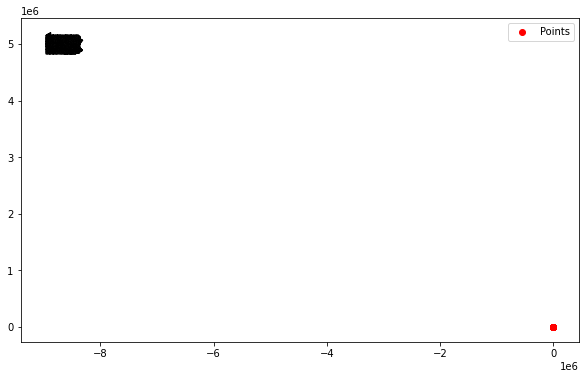

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile
shapefile_path = '/Users/edwardamoah/Downloads/Pennsylvania_Municipality_Boundary/Pennsylvania_Municipality_Boundary.shp'
gdf = gpd.read_file(shapefile_path)

# Load DataFrame with points
df_points = df2 #pd.read_csv('your_dataframe.csv')

# Plot shapefile
ax = gdf.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot points
plt.scatter(df_points['longitude'], df_points['latitude'], color='red', marker='o', label='Points')

# Show plot
plt.legend()
plt.show()


In [40]:
df2.to_csv('/Users/edwardamoah/Downloads/osmia_spring.csv', index=False)

In [51]:
import os
def filterFiles(classes, folder):
    # open the txt file to read
    files = []
    for file_path in os.listdir(folder):
        #print(file)
        file = open(os.path.join(folder, file_path), 'r')
        lines = file.readlines()
        #print(li)
        for line in lines:
            #print(line)
            label = line.split()[0]
            #print(type(label))
            if int(label) in classes:
                files.append(file_path)
                break
    return files

        


In [52]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/test/labels"
files = filterFiles(classes, folder)
print(len(files))

10


In [53]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/train/labels"
files = filterFiles(classes, folder)
print(len(files))

152


In [54]:
classes = [1,3]
folder = "/Users/edwardamoah/Documents/GitHub/BeeVision/solitary_bee_hotels/datasets/solitary-bee-hotels-5/valid/labels"
files = filterFiles(classes, folder)
print(len(files))

36


In [41]:
def removeFiles(files, folder):
    for file in os.listdir(folder):
        if file not in files:
            os.remove(os.path.join(folder, file))
            print(f"Remvoed {file}")

In [50]:
files

['motion_frame_14_jpg.rf.9cebca425574b00df5c480613ff6a7aa.txt',
 'motion_frame_38_jpg.rf.13ccce14f1b202edf3020b3aab869525.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.271e7e39099c8d3e25879e11fdfdd95d.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.abf2d3790aa2feadfbc4fc5c16491a99.txt',
 'motion_frame_30_jpg.rf.d00d8197881710ed2e95c3de7cef4fb5.txt',
 'motion_frame_38_jpg.rf.ddf9669074bd883f2ecdc844b10d0919.txt',
 'motion_frame_46_jpg.rf.e00bc27dee5c3aac49a72f0575a9594c.txt',
 '2023-05-29_13_50_27_frame_13811_jpg.rf.19233fc8d82ae9df40b6f5205f70bf87.txt',
 'motion_frame_38_jpg.rf.0ed05912b9b1212ba40dcab04c3219f7.txt',
 '2023-09-09_10_33_41_frame_1220_jpg.rf.82a31473e619a23407ff075866e4dcbf.txt',
 '2023-05-29_13_50_27_frame_677_jpg.rf.af5579db26ab7928112a6aa99842a934.txt',
 '2023-05-29_13_50_27_frame_13809_jpg.rf.65088781f49c990365e42de0d5f6c427.txt',
 'motion_frame_46_jpg.rf.5c1f9af333a7c27bfb886829ccbc4fda.txt',
 'motion_frame_30_jpg.rf.cc36e507355f2b82e686cd0fc1c25ce9.txt',
 '2023-09-0

In [45]:
train_files = [file.split(".txt")[0]+".jpg" for file in files]


In [46]:
train_files

['2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-05-10_18_00_01_frame_131_jpg.rf.a86e725b38215df42dc2ee7c99aa0d0c.jpg',
 '2023-09-15_10_00_31_frame_2970_jpg.rf.348b212627f16fba95d17370